# Introduction
<b>This dataset is divided into two parts as training and test data. There are approximately 5000 images in both folders. And finally, there are 4 classes in this dataset;

1.MildDemented

2.VeryMildDemented

3.NonDemented

4.ModerateDemeneted</b>

<font color = 'blue'>
Content: 

1. [Importing Necessary Libraries](#1)
1. [Loading Data and Data Preprocessing](#2)
  
1. [VGG16](#4)
    * [VGG16 Evaluation](#5)

1. [VGG19](#6)
    * [VGG19 Evaluation](#7)

1. [ResNet50](#8)
    * [ResNet50 Evaluation](#9)
   

6. [ResNet101](#10)
    * [ResNet Evaluation](#11)
   

7. [MobileNet](#12)
    * [MobileNet Evaluation](#13)
    

8. [MobileNetV2](#14)
    * [MobileNetV2 Evaluation](#15)


9. [DenseNet169](#16)
    * [DenseNet169 Evaluation](#17)


10. [DenseNet121](#18)
    * [DenseNet121 Evaluation](#19)
    

11. [Xception](#20)
    * [Xception Evaluation](#21)
    

12. [Model Comparison](#22)

<a id = "1"></a><br>
# Importing Necessary Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import InputLayer, BatchNormalization,Activation, MaxPool2D
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet169 
from tensorflow.keras.applications.densenet import DenseNet121 
from tensorflow.keras.applications.xception import Xception

import tqdm
import keras
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)



/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Num GPUs Available:  1


<a id = "2"></a><br>
# Loading Data and Data Preprocessing

In [2]:
batch_size=60
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     
train_data = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=img_size, 
                                                 subset="training",
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2) 
validation_data= image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')


submission = image_generator.flow_from_directory(
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=img_size, 
                                                 class_mode=None)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


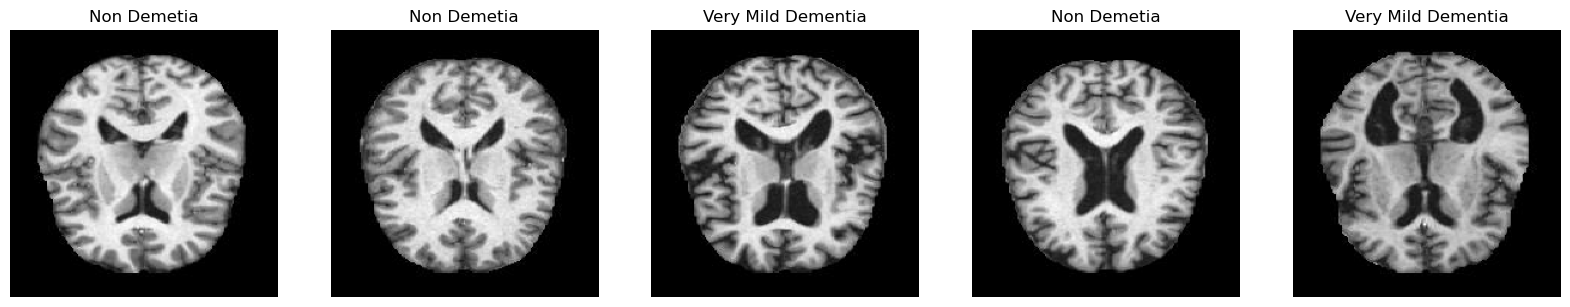

In [3]:
#Visualize some example with labels
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in range(5):
    rand1 = np.random.randint(len(train_data))
    rand2 = np.random.randint(60)
    ax[i].imshow(train_data[rand1][0][rand2])
    ax[i].axis('off')
    a = train_data[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')
        
     

In [4]:
#same for every model
batch_size=60
epoch=35
callback= keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

<a id = "4"></a><br>
# VGG16

In [5]:
vgg16 = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)


for layer in vgg16.layers:
    layer.trainable = False


x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg16 = Model(inputs=vgg16.input, outputs=out)

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

#compiling
modelvgg16.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelvgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [6]:
hist_vgg16=modelvgg16.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 55s 519ms/step - loss: 160.9419 - accuracy: 0.5214 - val_loss: 1.8641 - val_accuracy: 0.5176
Epoch 2/35
86/86 [==============================] - 21s 244ms/step - loss: 951.4999 - accuracy: 0.5897 - val_loss: 2.1090 - val_accuracy: 0.6059
Epoch 3/35
86/86 [==============================] - 25s 283ms/step - loss: 708.9859 - accuracy: 0.6827 - val_loss: 2.2749 - val_accuracy: 0.5254
Epoch 4/35
86/86 [==============================] - 33s 369ms/step - loss: 543.1219 - accuracy: 0.6872 - val_loss: 1.6104 - val_accuracy: 0.6560
Epoch 5/35
86/86 [==============================] - 18s 203ms/step - loss: 652.5089 - accuracy: 0.6977 - val_loss: 1.4887 - val_accuracy: 0.6685
Epoch 6/35
86/86 [==============================] - 18s 210ms/step - loss: 222.4662 - accuracy: 0.7700 - val_loss: 1.4897 - val_accuracy: 0.6740
Epoch 7/35
86/86 [==============================] - 18s 210ms/step - loss: 574.5728 - accuracy: 0.7760 - val_loss: 1.3462 - val_ac

<a id = "5"></a><br>
## VGG16 Evaluation

In [7]:
loss_vgg16,accuracy_vgg16 = modelvgg16.evaluate(validation_data)


22/22 [==============================] - 4s 170ms/step - loss: 0.9823 - accuracy: 0.6904


<a id = "6"></a><br>
# VGG19

In [8]:
vgg19 = VGG19(input_shape=(224, 224, 3), weights="imagenet", include_top=False)


for layer in vgg19.layers:
    layer.trainable = False


x = Flatten()(vgg19.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg19 = Model(inputs=vgg19.input, outputs=out)

# compiling
modelvgg19.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


modelvgg19.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
hist_vgg19=modelvgg19.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 20s 216ms/step - loss: 117.8795 - accuracy: 0.4733 - val_loss: 20.9164 - val_accuracy: 0.5004
Epoch 2/35
86/86 [==============================] - 19s 216ms/step - loss: 1000.8774 - accuracy: 0.1650 - val_loss: 6.8288 - val_accuracy: 0.1400
Epoch 3/35
86/86 [==============================] - 19s 219ms/step - loss: 1514.1271 - accuracy: 0.3333 - val_loss: 1.1014 - val_accuracy: 0.5004
Epoch 4/35
86/86 [==============================] - 18s 211ms/step - loss: 4.6354 - accuracy: 0.4999 - val_loss: 1.0589 - val_accuracy: 0.5004
Epoch 5/35
86/86 [==============================] - 19s 224ms/step - loss: 1.0564 - accuracy: 0.4989 - val_loss: 1.0528 - val_accuracy: 0.5004
Epoch 6/35
86/86 [==============================] - 20s 237ms/step - loss: 1.0524 - accuracy: 0.4987 - val_loss: 1.0498 - val_accuracy: 0.5004
Epoch 7/35
86/86 [==============================] - 19s 222ms/step - loss: 1.0479 - accuracy: 0.5001 - val_loss: 1.0510 - val_accurac

<a id = "7"></a><br>
## VGG19 Evaluation

In [10]:
loss_vgg19,accuracy_vgg19= modelvgg19.evaluate(validation_data)

22/22 [==============================] - 3s 151ms/step - loss: 1.0179 - accuracy: 0.5004


<a id = "8"></a><br>
# ResNet50

In [11]:
rn50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in rn50.layers:
    layer.trainable = False
x = Flatten()(rn50.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelrn50= Model(inputs=rn50.input, outputs=out)

#compiling
modelrn50.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelrn50.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [12]:
hist_rn50=modelrn50.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 24s 221ms/step - loss: 4.4202 - accuracy: 0.4476 - val_loss: 1.6297 - val_accuracy: 0.4003
Epoch 2/35
86/86 [==============================] - 18s 210ms/step - loss: 1.0214 - accuracy: 0.5573 - val_loss: 1.2888 - val_accuracy: 0.4011
Epoch 3/35
86/86 [==============================] - 16s 188ms/step - loss: 1.1121 - accuracy: 0.5532 - val_loss: 0.9782 - val_accuracy: 0.5371
Epoch 4/35
86/86 [==============================] - 17s 196ms/step - loss: 0.9193 - accuracy: 0.6091 - val_loss: 1.0594 - val_accuracy: 0.4816
Epoch 5/35
86/86 [==============================] - 18s 205ms/step - loss: 0.8868 - accuracy: 0.6134 - val_loss: 0.9129 - val_accuracy: 0.5981
Epoch 6/35
86/86 [==============================] - 18s 207ms/step - loss: 0.8656 - accuracy: 0.6280 - val_loss: 1.3182 - val_accuracy: 0.4128
Epoch 7/35
86/86 [==============================] - 18s 209ms/step - loss: 0.7652 - accuracy: 0.6756 - val_loss: 1.0104 - val_accuracy: 0.5262

<a id = "9"></a><br>
## ResNet50 Evaluation

In [13]:
loss_rn50,accuracy_rn50= modelrn50.evaluate(validation_data)

22/22 [==============================] - 3s 149ms/step - loss: 0.9129 - accuracy: 0.5981


<a id = "10"></a><br>
# ResNet101

In [14]:
rn101 = ResNet101(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in rn101.layers:
    layer.trainable = False
x = Flatten()(rn101.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelrn101= Model(inputs=rn101.input, outputs=out)

# Compiling
modelrn101.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelrn101.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                         

In [15]:
hist_rn101=modelrn101.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 29s 262ms/step - loss: 2.3990 - accuracy: 0.4937 - val_loss: 1.0066 - val_accuracy: 0.5145
Epoch 2/35
86/86 [==============================] - 20s 233ms/step - loss: 0.9998 - accuracy: 0.5370 - val_loss: 0.9976 - val_accuracy: 0.5246
Epoch 3/35
86/86 [==============================] - 20s 231ms/step - loss: 0.9845 - accuracy: 0.5444 - val_loss: 1.0314 - val_accuracy: 0.4988
Epoch 4/35
86/86 [==============================] - 21s 245ms/step - loss: 0.9413 - accuracy: 0.5722 - val_loss: 0.9661 - val_accuracy: 0.5364
Epoch 5/35
86/86 [==============================] - 20s 233ms/step - loss: 0.9106 - accuracy: 0.5850 - val_loss: 0.9507 - val_accuracy: 0.5614
Epoch 6/35
86/86 [==============================] - 20s 236ms/step - loss: 0.8858 - accuracy: 0.5968 - val_loss: 0.9428 - val_accuracy: 0.5676
Epoch 7/35
86/86 [==============================] - 20s 231ms/step - loss: 0.8687 - accuracy: 0.6065 - val_loss: 0.9331 - val_accuracy: 0.5684

<a id = "11"></a><br>
## ResNet Evaluation

In [16]:
loss_rn101,accuracy_rn101= modelrn101.evaluate(validation_data)

22/22 [==============================] - 4s 177ms/step - loss: 0.9192 - accuracy: 0.5872


<a id = "12"></a><br>
# MobileNet

In [17]:
mobilenet = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = False
x = Flatten()(mobilenet.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelmnet= Model(inputs=mobilenet.input, outputs=out)

#Compiling
modelmnet.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelmnet.summary()


17225924/17225924 [==============================] - 0s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128  

In [18]:
hist_mnet=modelmnet.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 19s 192ms/step - loss: 4.8854 - accuracy: 0.6221 - val_loss: 1.1891 - val_accuracy: 0.6536
Epoch 2/35
86/86 [==============================] - 15s 169ms/step - loss: 0.2203 - accuracy: 0.9154 - val_loss: 1.3002 - val_accuracy: 0.6403
Epoch 3/35
86/86 [==============================] - 17s 202ms/step - loss: 0.0707 - accuracy: 0.9834 - val_loss: 1.4795 - val_accuracy: 0.6646
Epoch 4/35
86/86 [==============================] - 18s 208ms/step - loss: 0.0323 - accuracy: 0.9967 - val_loss: 1.3038 - val_accuracy: 0.6927
Epoch 5/35
86/86 [==============================] - 16s 191ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2711 - val_accuracy: 0.6951
Epoch 6/35
86/86 [==============================] - 16s 180ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.3607 - val_accuracy: 0.6896
Epoch 7/35
86/86 [==============================] - 16s 183ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.2873 - val_accuracy: 0.6966

<a id = "13"></a><br>
## MobileNet Evaluation

In [19]:
loss_mnet,accuracy_mnet= modelmnet.evaluate(validation_data)

22/22 [==============================] - 3s 140ms/step - loss: 1.1891 - accuracy: 0.6536


<a id = "14"></a><br>
# MobileNetV2

In [20]:
mobilenetv2= MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in mobilenetv2.layers:
    layer.trainable = False
x = Flatten()(mobilenetv2.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelmnetv2= Model(inputs=mobilenetv2.input, outputs=out)

#Compiling
modelmnetv2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modelmnetv2.summary();

9406464/9406464 [==============================] - 0s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                             

In [21]:
hist_mnetv2=modelmnetv2.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 22s 211ms/step - loss: 3.3207 - accuracy: 0.6089 - val_loss: 1.7450 - val_accuracy: 0.6020
Epoch 2/35
86/86 [==============================] - 15s 173ms/step - loss: 0.3487 - accuracy: 0.8696 - val_loss: 1.9692 - val_accuracy: 0.5989
Epoch 3/35
86/86 [==============================] - 16s 190ms/step - loss: 0.1123 - accuracy: 0.9602 - val_loss: 1.4115 - val_accuracy: 0.6747
Epoch 4/35
86/86 [==============================] - 16s 189ms/step - loss: 0.2040 - accuracy: 0.9244 - val_loss: 2.6904 - val_accuracy: 0.5919
Epoch 5/35
86/86 [==============================] - 17s 196ms/step - loss: 0.1789 - accuracy: 0.9383 - val_loss: 2.0614 - val_accuracy: 0.6286
Epoch 6/35
86/86 [==============================] - 15s 178ms/step - loss: 0.0215 - accuracy: 0.9951 - val_loss: 1.7071 - val_accuracy: 0.6888
Epoch 7/35
86/86 [==============================] - 16s 183ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.6817 - val_accuracy: 0.6857

<a id = "15"></a><br>
## MobileNetV2 Evaluation

In [22]:
loss_mnetv2,accuracy_mnetv2= modelmnetv2.evaluate(validation_data)

22/22 [==============================] - 3s 151ms/step - loss: 1.4115 - accuracy: 0.6747


<a id = "16"></a><br>
# DenseNet169

In [23]:
dnet169 = DenseNet169(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in dnet169.layers:
    layer.trainable = False
x = Flatten()(dnet169.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modeldnet169= Model(inputs=dnet169.input, outputs=out)

# Compiling
modeldnet169.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Summary
modeldnet169.summary()

51877672/51877672 [==============================] - 0s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_7[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

In [24]:
hist_dnet169=modeldnet169.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 35s 273ms/step - loss: 16.8550 - accuracy: 0.5524 - val_loss: 2.9027 - val_accuracy: 0.5231
Epoch 2/35
86/86 [==============================] - 17s 194ms/step - loss: 1.1601 - accuracy: 0.7680 - val_loss: 2.2652 - val_accuracy: 0.6216
Epoch 3/35
86/86 [==============================] - 18s 206ms/step - loss: 0.9402 - accuracy: 0.8079 - val_loss: 3.7959 - val_accuracy: 0.5739
Epoch 4/35
86/86 [==============================] - 17s 197ms/step - loss: 0.9834 - accuracy: 0.8184 - val_loss: 2.2850 - val_accuracy: 0.6599
Epoch 5/35
86/86 [==============================] - 16s 189ms/step - loss: 0.5644 - accuracy: 0.8787 - val_loss: 2.5563 - val_accuracy: 0.6661
Epoch 6/35
86/86 [==============================] - 19s 222ms/step - loss: 0.1397 - accuracy: 0.9516 - val_loss: 2.6638 - val_accuracy: 0.6443
Epoch 7/35
86/86 [==============================] - 18s 208ms/step - loss: 0.3230 - accuracy: 0.9195 - val_loss: 2.7478 - val_accuracy: 0.659

<a id = "17"></a><br>
## DenseNet169 Evaluation

In [25]:
loss_dnet169,accuracy_dnet169= modeldnet169.evaluate(validation_data)


22/22 [==============================] - 3s 151ms/step - loss: 2.2652 - accuracy: 0.6216


<a id = "18"></a><br>
# DenseNet121

In [26]:
dnet121=DenseNet121(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in dnet121.layers:
    layer.trainable = False
x = Flatten()(dnet121.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modeldnet121= Model(inputs=dnet121.input, outputs=out)

# Compiling
modeldnet121.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#Summary
modeldnet121.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                           

In [27]:
hist_dnet121=modeldnet121.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 26s 230ms/step - loss: 7.8832 - accuracy: 0.5782 - val_loss: 2.4472 - val_accuracy: 0.4840
Epoch 2/35
86/86 [==============================] - 17s 196ms/step - loss: 1.4141 - accuracy: 0.6899 - val_loss: 3.4347 - val_accuracy: 0.4652
Epoch 3/35
86/86 [==============================] - 16s 184ms/step - loss: 0.7328 - accuracy: 0.7877 - val_loss: 2.6511 - val_accuracy: 0.5614
Epoch 4/35
86/86 [==============================] - 19s 225ms/step - loss: 0.8802 - accuracy: 0.8041 - val_loss: 3.0558 - val_accuracy: 0.5622
Epoch 5/35
86/86 [==============================] - 18s 208ms/step - loss: 0.4468 - accuracy: 0.8735 - val_loss: 2.8264 - val_accuracy: 0.6310
Epoch 6/35
86/86 [==============================] - 18s 213ms/step - loss: 0.5780 - accuracy: 0.8506 - val_loss: 1.3527 - val_accuracy: 0.6787
Epoch 7/35
86/86 [==============================] - 17s 197ms/step - loss: 0.1139 - accuracy: 0.9606 - val_loss: 1.5810 - val_accuracy: 0.6755

<a id = "19"></a><br>
## DenseNet121 Evaluation

In [28]:
loss_dnet121,accuracy_dnet121= modeldnet121.evaluate(validation_data)

22/22 [==============================] - 3s 147ms/step - loss: 1.3527 - accuracy: 0.6787


<a id = "20"></a><br>
# Xception

In [29]:
xception=Xception(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in xception.layers:
    layer.trainable = False
x = Flatten()(xception.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelxception= Model(inputs=xception.input, outputs=out)

# Compiling
modelxception.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Summary
modelxception.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                    

In [30]:
hist_xception=modelxception.fit(train_data, epochs=epoch, validation_data=validation_data, callbacks=callback)

Epoch 1/35
86/86 [==============================] - 25s 230ms/step - loss: 4.4207 - accuracy: 0.5421 - val_loss: 1.1571 - val_accuracy: 0.5395
Epoch 2/35
86/86 [==============================] - 18s 212ms/step - loss: 0.7137 - accuracy: 0.6922 - val_loss: 1.0036 - val_accuracy: 0.5410
Epoch 3/35
86/86 [==============================] - 18s 206ms/step - loss: 0.5518 - accuracy: 0.7733 - val_loss: 0.9015 - val_accuracy: 0.6130
Epoch 4/35
86/86 [==============================] - 17s 200ms/step - loss: 0.4772 - accuracy: 0.8041 - val_loss: 1.0615 - val_accuracy: 0.5919
Epoch 5/35
86/86 [==============================] - 18s 211ms/step - loss: 0.5043 - accuracy: 0.8082 - val_loss: 1.9218 - val_accuracy: 0.5348
Epoch 6/35
86/86 [==============================] - 16s 191ms/step - loss: 0.3375 - accuracy: 0.8711 - val_loss: 0.9920 - val_accuracy: 0.6255
Epoch 7/35
86/86 [==============================] - 18s 210ms/step - loss: 0.2440 - accuracy: 0.9217 - val_loss: 1.1906 - val_accuracy: 0.5973

<a id = "21"></a><br>
## Xception Evaluation

In [31]:
loss_xception,accuracy_xception= modelxception.evaluate(validation_data)

22/22 [==============================] - 4s 159ms/step - loss: 0.9015 - accuracy: 0.6130


<a id = "22"></a><br>
# Model Comparison

         Model      Loss  Accuracy
1        VGG19  1.017878  0.500391
3    ResNet101  0.919166  0.587177
2     ResNet50  0.912921  0.598124
8     Xception  0.901485  0.612979
6  DenseNet169  2.265214  0.621579
4    MobileNet  1.189127  0.653636
5  MobileNetV2  1.411475  0.674746
7  DenseNet121  1.352663  0.678655
0        VGG16  0.982275  0.690383


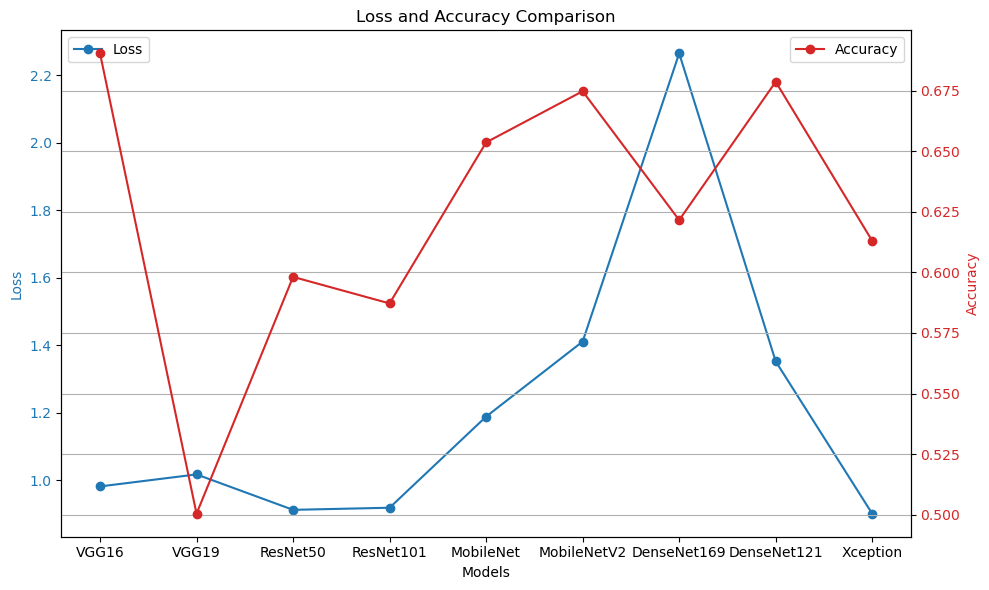

In [32]:
models = ['VGG16', 'VGG19', 'ResNet50', 'ResNet101', 'MobileNet', 'MobileNetV2', 'DenseNet169','DenseNet121','Xception']
loss_values = [loss_vgg16, loss_vgg19, loss_rn50, loss_rn101, loss_mnet, loss_mnetv2, loss_dnet169,loss_dnet121,loss_xception]
accuracy_values = [accuracy_vgg16, accuracy_vgg19, accuracy_rn50, accuracy_rn101, accuracy_mnet, accuracy_mnetv2, accuracy_dnet169, accuracy_dnet121, accuracy_xception]

data = {'Model': models, 'Loss': loss_values, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)
df = df.sort_values(by='Accuracy')#ranked by accuracy1
print(df)


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Loss', color=color)
ax1.plot(models, loss_values, marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')


ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(models, accuracy_values, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Loss and Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()